# Projeto #4: Classificação de texto

### Base de dados escolhida:

<p align="justify">A base escolhida foi a <b>UTL Corpus</b> que é um conjunto de dados, em português, que contém críticas de filmes e apps coletadas automaticamente de sites.</p>

- **Nome da base**: UTLCorpus
- **Link do drive**: https://drive.google.com/file/d/1vSlDdOIYshNvCyRsZfw_qTmvwlTiS_JG/view?usp=sharing
- **Repositório**: https://github.com/RogerFig/UTLCorpus
- **Artigo de referência**: https://repositorio.usp.br/item/002971317

<p align="justify">Esse corpus é uma coleção de resenhas extraídas de dois domínios: filmes e aplicativos. A base possui 15 atributos e 2.881.589 avaliações sendo 1.839.851 de filmes e 1.041.738 de aplicativos. O domínio utilizado nesse projeto será o de aplicativos.</p>

### Hipóteses:

## Preparação dos dados

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Numpy: {np.__version__}')

Versão Pandas: 1.0.5
Versão Numpy: 1.17.4


### Bibliotecas de visualização

In [2]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use(['ggplot'])

print(f'Versão Seaborn: {sns.__version__}')
print(f'Versão Matplotlib: {matplotlib.__version__}')

Versão Seaborn: 0.10.1
Versão Matplotlib: 3.2.1


### Dicionário dos dados

**domain**: domínio das resenhas

**object**: aplicativo avaliado

**author**: autor da avaliação (anonimizado)

**text**: texto da avaliação

**likes**: número de likes

**unlikes**: número de deslikes

**stars**: número de estrelas dada na avaliação

**date**: data da avaliação

**collect_date**: data da coleta dos dados

**internal_id**: identificador

### Carregamento dos dados

In [3]:
data = pd.read_csv('dados/UTLCorpus.csv')
print(f'Linhas: {data.shape[0]} | Colunas: {data.shape[1]}')

Linhas: 2881589 | Colunas: 16


In [4]:
apps = data.query('domain=="apps"')
apps.drop(['Unnamed: 0', 'replies', 'favorite', 'want_see', 'recommend', 'see'], axis=1, inplace=True)
apps.reset_index(drop=True, inplace=True)
print(f'Linhas: {apps.shape[0]} | Colunas: {apps.shape[1]}')

Linhas: 1041738 | Colunas: 10


### Características dos dados

In [5]:
apps.head()

,domain,object,author,text,likes,unlikes,stars,date,collect_date,internal_id
0,apps,air.com.hypah.io.slither,0,"Adorei, podia melhorar em vários detalhes, por...",1100,0,5.0,22 de janeiro de 2019,11 de abril de 2019,0
1,apps,air.com.hypah.io.slither,1,"17 de março, estamos no ps4 jogando r6, e talv...",152,0,5.0,17 de março de 2019,11 de abril de 2019,1
2,apps,air.com.hypah.io.slither,2,É um jogo bom hzbsbbsbdjdjkaklloosjbsbzbsbhhHA...,0,0,5.0,3 de março de 2019,11 de abril de 2019,2
3,apps,air.com.hypah.io.slither,3,O jogo e mais o menos um pouco bom só que ele ...,0,0,2.0,1 de abril de 2019,11 de abril de 2019,3
4,apps,air.com.hypah.io.slither,4,0. JOGO. E. MUITO. CHATO. MAIS. E. RASUAVEL. V...,0,0,2.0,6 de abril de 2019,11 de abril de 2019,4


In [6]:
print(f'Colunas presentes: {apps.columns.values}')

Colunas presentes: ['domain' 'object' 'author' 'text' 'likes' 'unlikes' 'stars' 'date'
 'collect_date' 'internal_id']


In [7]:
print(f'Tipos dos dados: {apps.dtypes.unique()}')

Tipos dos dados: [dtype('O') dtype('int64') dtype('float64')]


In [8]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041738 entries, 0 to 1041737
Data columns (total 10 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   domain        1041738 non-null  object 
 1   object        1041738 non-null  object 
 2   author        1041738 non-null  int64  
 3   text          1039542 non-null  object 
 4   likes         1041738 non-null  int64  
 5   unlikes       1041738 non-null  int64  
 6   stars         1041738 non-null  float64
 7   date          1041738 non-null  object 
 8   collect_date  1041738 non-null  object 
 9   internal_id   1041738 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 79.5+ MB


### Descrição dos dados

In [9]:
apps.drop(['author', 'internal_id'], axis=1).describe()

,likes,unlikes,stars
count,1.041738e+06,1041738.0,1.041738e+06
mean,6.015706e+00,0.0,3.957394e+00
std,8.619111e+01,0.0,1.527780e+00
min,0.000000e+00,0.0,0.000000e+00
25%,0.000000e+00,0.0,3.000000e+00
50%,0.000000e+00,0.0,5.000000e+00
75%,0.000000e+00,0.0,5.000000e+00
max,2.014600e+04,0.0,5.000000e+00


In [10]:
apps[['object', 'text']].describe(include='O')

,object,text
count,1041738,1039542
unique,233,809232
top,com.b2w.americanas,muito bom
freq,5080,17946


### Valores nulos

In [11]:
data_missing = pd.DataFrame({'nomes': apps.columns, 
                             'tipos': apps.dtypes, 
                             'NA #': apps.isna().sum(),
                             'NA %': (apps.isna().sum() / apps.shape[0]) * 100
                            })

data_missing[data_missing['NA #'] > 0].set_index('nomes')

,tipos,NA #,NA %
nomes,,,
text,object,2196,0.210802


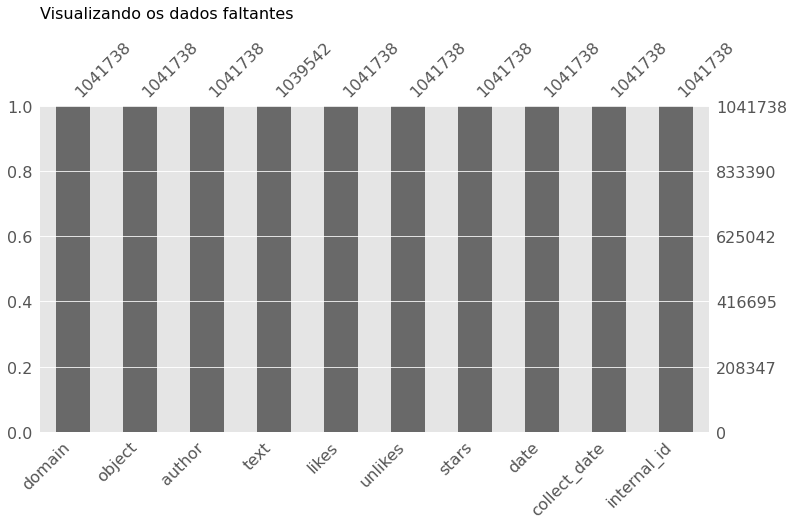

In [12]:
import missingno as msno

msno.bar(apps, figsize=[12, 6])
plt.title('Visualizando os dados faltantes', y=1.25, size=16, loc='left')
plt.show()

#### Remoção das linhas com texto nulos

In [13]:
apps.dropna(inplace=True)
print('Conferindo a remoção dos valores nulos: ')
apps.isna().sum()

Conferindo a remoção dos valores nulos: 


domain          0
object          0
author          0
text            0
likes           0
unlikes         0
stars           0
date            0
collect_date    0
internal_id     0
dtype: int64

### Definição dos rótulos

## Análise dos dados